<a href="https://colab.research.google.com/github/Adivah12/Machine-Learning/blob/main/PreparingData_CatEast_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [ ]:
from google.colab import files    # Untuk upload files
import zipfile                    # Untuk unzip file
import os                         # Untuk interaksi dengan os
import matplotlib.pyplot as plt   # Untuk visualisasi data
import matplotlib.image as mpimg  # Membaca dan memanipulasi gambar


# PERSIAPAN DATASET


Mengambil dataset dari kaggle

In [ ]:
!pip install -q Kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle                #membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle/         #memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json   #merubah permission file kaggle.json

In [ ]:
!kaggle datasets download -d adityavahreza/cat-skin-disease

Dataset URL: https://www.kaggle.com/datasets/adityavahreza/cat-skin-disease
License(s): unknown
 51% 10.0M/19.6M [00:00<00:00, 31.1MB/s]
100% 19.6M/19.6M [00:00<00:00, 54.1MB/s]


Load Dataset


In [ ]:
# Extract zipfile
! unzip "/content/cat-skin-disease.zip" -d.

Archive:  /content/cat-skin-disease.zip
  inflating: ./CAT SKIN DISEASE/Health/04ab5725b230e3d3e76031f9cf1c95f9_jpg.rf.405ef84073960c0085b2018d77d0375e.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0bc984c93228017f4727e0c852126f7d_jpg.rf.bf7d7a91fa42774fa38b03cbcf58c5c1.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0f210d552b92c7204442138de5151b55_jpg.rf.aae8a1537e4f29b4c09fce3c0a4091e7.jpg  
  inflating: ./CAT SKIN DISEASE/Health/15a8e5d7bc0011c973b3fa37e490bd7a_jpg.rf.c45bdc80a9bcd5b6655b586ed3f3fc48.jpg  
  inflating: ./CAT SKIN DISEASE/Health/1e161cf3433aee7231b8b56333127e5c_jpg.rf.a39934baa8d1de7b2e4d01a9c404bcb1.jpg  
  inflating: ./CAT SKIN DISEASE/Health/20d4646247bd7033d6d76f64566f0052_jpg.rf.219ac65aabce12bf7c00ff09bb2bc9d3.jpg  
  inflating: ./CAT SKIN DISEASE/Health/26da1f8b744ccff35a3cba4026407b9d_jpg.rf.2abec213f35d42b8b46604a65cc38956.jpg  
  inflating: ./CAT SKIN DISEASE/Health/2b9be78add42a048bc7cca3afee5ca6c_jpg.rf.dc9218d7696d506344ffadfec4bf4e2a.jpg  
  inflating: ./C

Menentukan class

In [ ]:
cat_disease = "/content/CAT SKIN DISEASE"
cat_disease_classes = os.listdir(cat_disease)

In [ ]:
print("Cat Skin Disease Class :")
for class_name in cat_disease_classes:
  if os.path.isdir(os.path.join(cat_disease, class_name)):
    print(class_name)

Cat Skin Disease Class :
Scabies
Health
Ringworm
Lepra


Preview Gambar


Scabies
Total Image :  109
Resolusi Gambar :  (183, 275, 3)


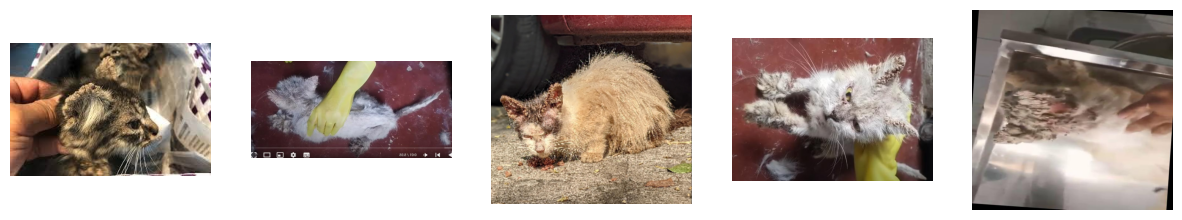


Health
Total Image :  99
Resolusi Gambar :  (640, 640, 3)


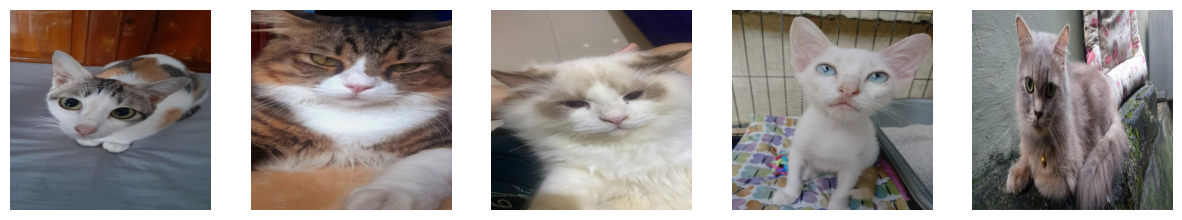


Ringworm
Total Image :  103
Resolusi Gambar :  (200, 266, 4)


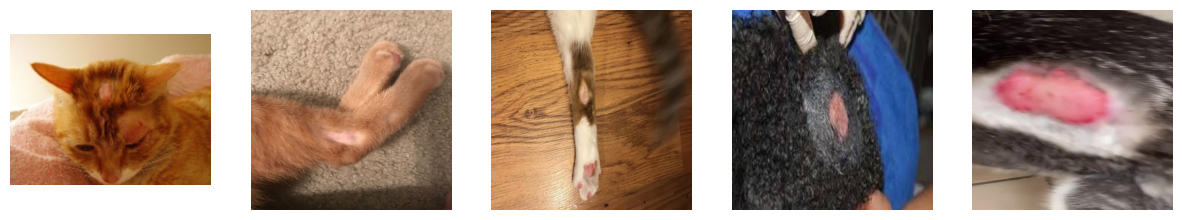


Lepra
Total Image :  100
Resolusi Gambar :  (224, 224, 3)


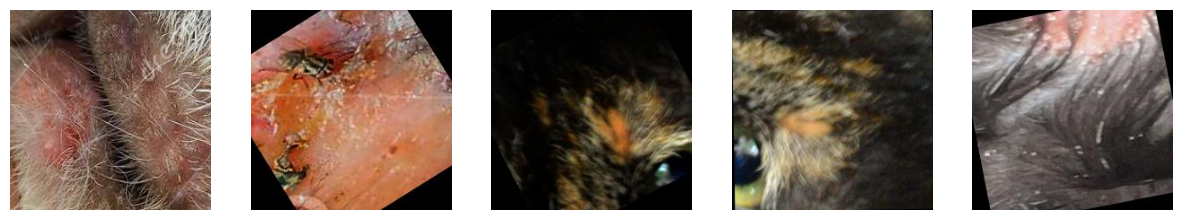

In [ ]:
for item in cat_disease_classes:
    print("")
    print(item)
    class_dir = os.path.join(cat_disease, item)
    class_images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

    # Menghitung total image di setiap kelas
    num_images = len(class_images)
    print("Total Image : ", num_images)

    # Menghitung resolusi pada gambar pertama
    img_path = os.path.join(class_dir, class_images[0])
    img = mpimg.imread(img_path)
    image_shape = img.shape
    print("Resolusi Gambar : ", image_shape)

    # Menampilkan beberapa gambar
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(class_images))):  # Tampilkan maksimum 5 gambar atau sesuai jumlah yang tersedia
        sp = plt.subplot(1, 5, i + 1)
        img = mpimg.imread(os.path.join(class_dir, class_images[i]))
        plt.axis('off')
        plt.imshow(img)
    plt.show()
